A firm must design a box of minimum dimensions to pack three circular objects with the following radii: $R1=6, R2=12, R3=16$.  Bearing in mind that the circles placed inside the box cannot overlap, formulate a non-linear programming problem that minimizes the box perimeter.

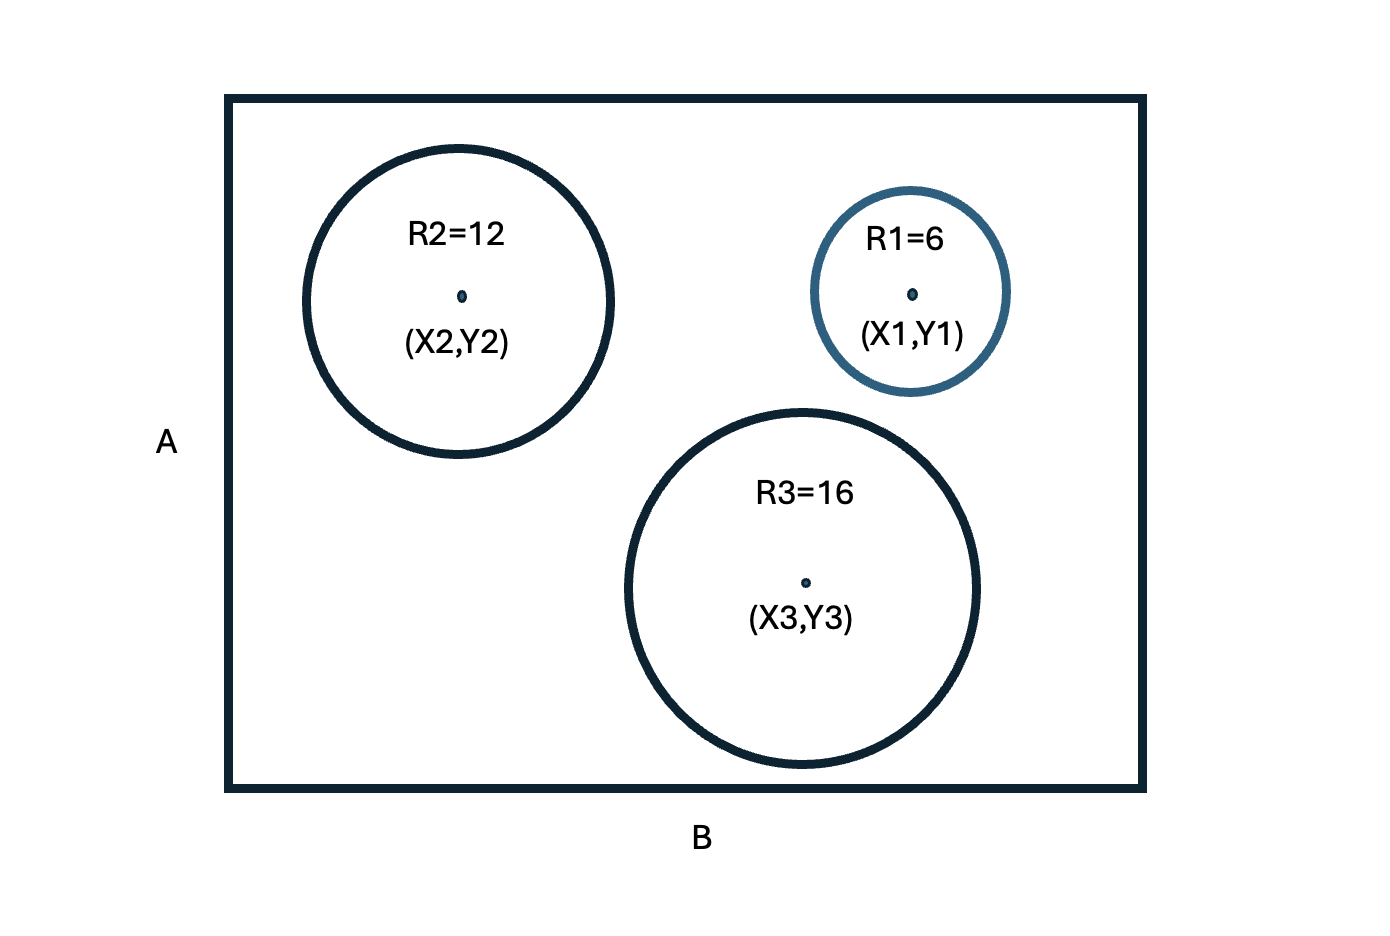

We have the following objective function:  

<center> $\large \min(A+B)$</center>

In order for all the circles to stay within the box:

$X_1,Y_1 \ge6$  where $X_1,Y_1$ is the center of circle of radius $6$

$X_2,Y_2 \ge12$  where $X_2,Y_2$ is the center of circle of radius $12$

$X_3,Y_3 \ge16$  where $X_3,Y_3$ is the center of circle of radius $16$

Also,

<center>

$X_1 \le B-6$

$Y_1 \le A-6$

$X_2 \le B-12$

$Y_2 \le A-12$

$X_3 \le B-16$

$Y_3 \le A-16$</center>

To prevent overlaps of the circles:

<center>

$(X_1-X_2)^2+(Y_1-Y_2)^2 \ge (6+12)^2=324$

$(X_1-X_3)^2+(Y_1-Y_3)^2 \ge (6+16)^2=484$

$(X_2-X_3)^2+(Y_2-Y_3)^2 \ge (12+16)^2=784$

$X_1,Y_1,X_2,Y_2,X_3,Y_3,A,B\ge0$

</center>




In [1]:
# Ipopt installer

import sys

if "google.colab" in sys.modules:
    !wget "https://raw.githubusercontent.com/IDAES/idaes-pse/main/scripts/colab_helper.py"
    import colab_helper
    colab_helper.install_idaes()
    colab_helper.install_ipopt()

--2025-08-20 22:39:58--  https://raw.githubusercontent.com/IDAES/idaes-pse/main/scripts/colab_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5459 (5.3K) [text/plain]
Saving to: ‘colab_helper.py.1’

colab_helper.py.1   100%[===================>]   5.33K  --.-KB/s    in 0s      

2025-08-20 22:39:58 (50.9 MB/s) - ‘colab_helper.py.1’ saved [5459/5459]

idaes was found! No need to install.


In [2]:
import pyomo.environ as pyo
from pyomo.environ import *

Set up variables

In [3]:
model = pyo.ConcreteModel()

model.x1 = Var(bounds=(6, None))
model.y1 = Var(bounds=(6, None))
model.x2 = Var(bounds=(12, None))
model.y2 = Var(bounds=(12, None))
model.x3 = Var(bounds=(16, None))
model.y3 = Var(bounds=(16, None))
model.A = Var(bounds=(0, None))
model.B = Var(bounds=(0, None))

Model Objective

In [4]:
model.obj = pyo.Objective(expr=2*(model.A+model.B), sense=minimize)

Constraints




In [5]:
# Linear Constraints

model.C1 = pyo.Constraint(expr=model.x1 <= model.B-6)
model.C2 = pyo.Constraint(expr=model.y1 <= model.A-6)
model.C3 = pyo.Constraint(expr=model.x2 <= model.B-12)
model.C4 = pyo.Constraint(expr=model.y2 <= model.A-12)
model.C5 = pyo.Constraint(expr=model.x3 <= model.B-16)
model.C6 = pyo.Constraint(expr=model.y3 <= model.A-16)

# Non-Linear Constraints

model.C7 = pyo.Constraint(expr=(model.x1-model.x2)**2+(model.y1-model.y2)**2 >= (6+12)**2)
model.C8 = pyo.Constraint(expr=(model.x1-model.x3)**2+(model.y1-model.y3)**2 >= (6+16)**2)
model.C9 = pyo.Constraint(expr=(model.x2-model.x3)**2+(model.y2-model.y3)**2 >= (12+16)**2)

In [6]:
opt = pyo.SolverFactory('ipopt')
opt.solve(model)

{'Problem': [{'Lower bound': -inf, 'Upper bound': inf, 'Number of objectives': 1, 'Number of constraints': 9, 'Number of variables': 8, 'Sense': 'unknown'}], 'Solver': [{'Status': 'ok', 'Message': 'Ipopt 3.13.2\\x3a Optimal Solution Found', 'Termination condition': 'optimal', 'Id': 0, 'Error rc': 0, 'Time': 0.04997730255126953}], 'Solution': [OrderedDict({'number of solutions': 0, 'number of solutions displayed': 0})]}

In [7]:
objective = pyo.value(model.obj)
A_value = pyo.value(model.A)
B_value = pyo.value(model.B)
print("A =", A_value)
print("B =", B_value)
print("Objective =", objective)

A = 55.1184666199641
B = 34.97056249994015
Objective = 180.1780582398085
